#📌 Extracción - Extracción del Archivo Tratado

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Angelcorrea44/Desaf-o3_TelecomXParte2_Latam/refs/heads/main/clientes_flat.csv"

clientes = pd.read_csv(url)

clientes.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


#🛠️ Preparación de los Datos - Eliminación de Columnas Irrelevantes

In [2]:
# Eliminar columnas que no aportan valor, como identificadores únicos
cols_to_drop = ['customerID']  # Ajusta los nombres según las columnas presentes
clientes = clientes.drop(columns=[col for col in cols_to_drop if col in clientes.columns])
print("Columnas eliminadas:", [col for col in cols_to_drop if col in clientes.columns])

Columnas eliminadas: []


#🛠️ Preparación de los Datos - Encoding

In [3]:
# Transformar variables categóricas a formato numérico usando one-hot encoding
cat_cols = clientes.select_dtypes(include=['object', 'category']).columns
clientes_encoded = pd.get_dummies(clientes, columns=cat_cols, drop_first=True)
print("Variables categóricas transformadas con one-hot encoding.")
clientes_encoded.head()

Variables categóricas transformadas con one-hot encoding.


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,cuentas_diarias,Churn_yes,customer.gender_male,customer.Partner_yes,customer.Dependents_yes,phone.PhoneService_yes,...,internet.StreamingTV_no internet service,internet.StreamingTV_yes,internet.StreamingMovies_no internet service,internet.StreamingMovies_yes,account.Contract_one year,account.Contract_two year,account.PaperlessBilling_yes,account.PaymentMethod_credit card (automatic),account.PaymentMethod_electronic check,account.PaymentMethod_mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


#🛠️ Preparación de los Datos - Verificación de la Proporción de Cancelación (Churn)

In [4]:
# Calcular la proporción de clientes que cancelaron vs. los que permanecieron activos en clientes_encoded
if 'Churn_yes' in clientes_encoded.columns:
    proporciones = clientes_encoded['Churn_yes'].value_counts(normalize=True)
    print("Proporción de clases (churn) en clientes_encoded:")
    print(proporciones)
else:
    print("La columna 'churn' no está disponible en el DataFrame clientes_encoded.")

Proporción de clases (churn) en clientes_encoded:
Churn_yes
False    0.74281
True     0.25719
Name: proportion, dtype: float64


#🛠️ Preparación de los Datos - Balanceo de Clases

In [5]:
# Antes de aplicar SMOTE, elimina o imputa los valores faltantes (NaN)
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

if 'Churn_yes' in clientes_encoded.columns:
    X = clientes_encoded.drop('Churn_yes', axis=1)
    y = clientes_encoded['Churn_yes']

    # Imputar valores faltantes con la media (puedes usar 'median' o 'most_frequent' según el caso)
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Aplicar SMOTE para balancear las clases
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

    print("Distribución de clases después de SMOTE:")
    print(pd.Series(y_resampled).value_counts(normalize=True))
else:
    print("La columna 'Churn_yes' no está disponible en el DataFrame clientes_encoded.")

Distribución de clases después de SMOTE:
Churn_yes
False    0.5
True     0.5
Name: proportion, dtype: float64


#🛠️ Preparación de los Datos - Normalización o Estandarización

In [6]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos balanceados (X_resampled)
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

print("Datos estandarizados listos para modelos sensibles a la escala.")

Datos estandarizados listos para modelos sensibles a la escala.


🎯 Correlación y Selección de Variables - Análisis de Correlación

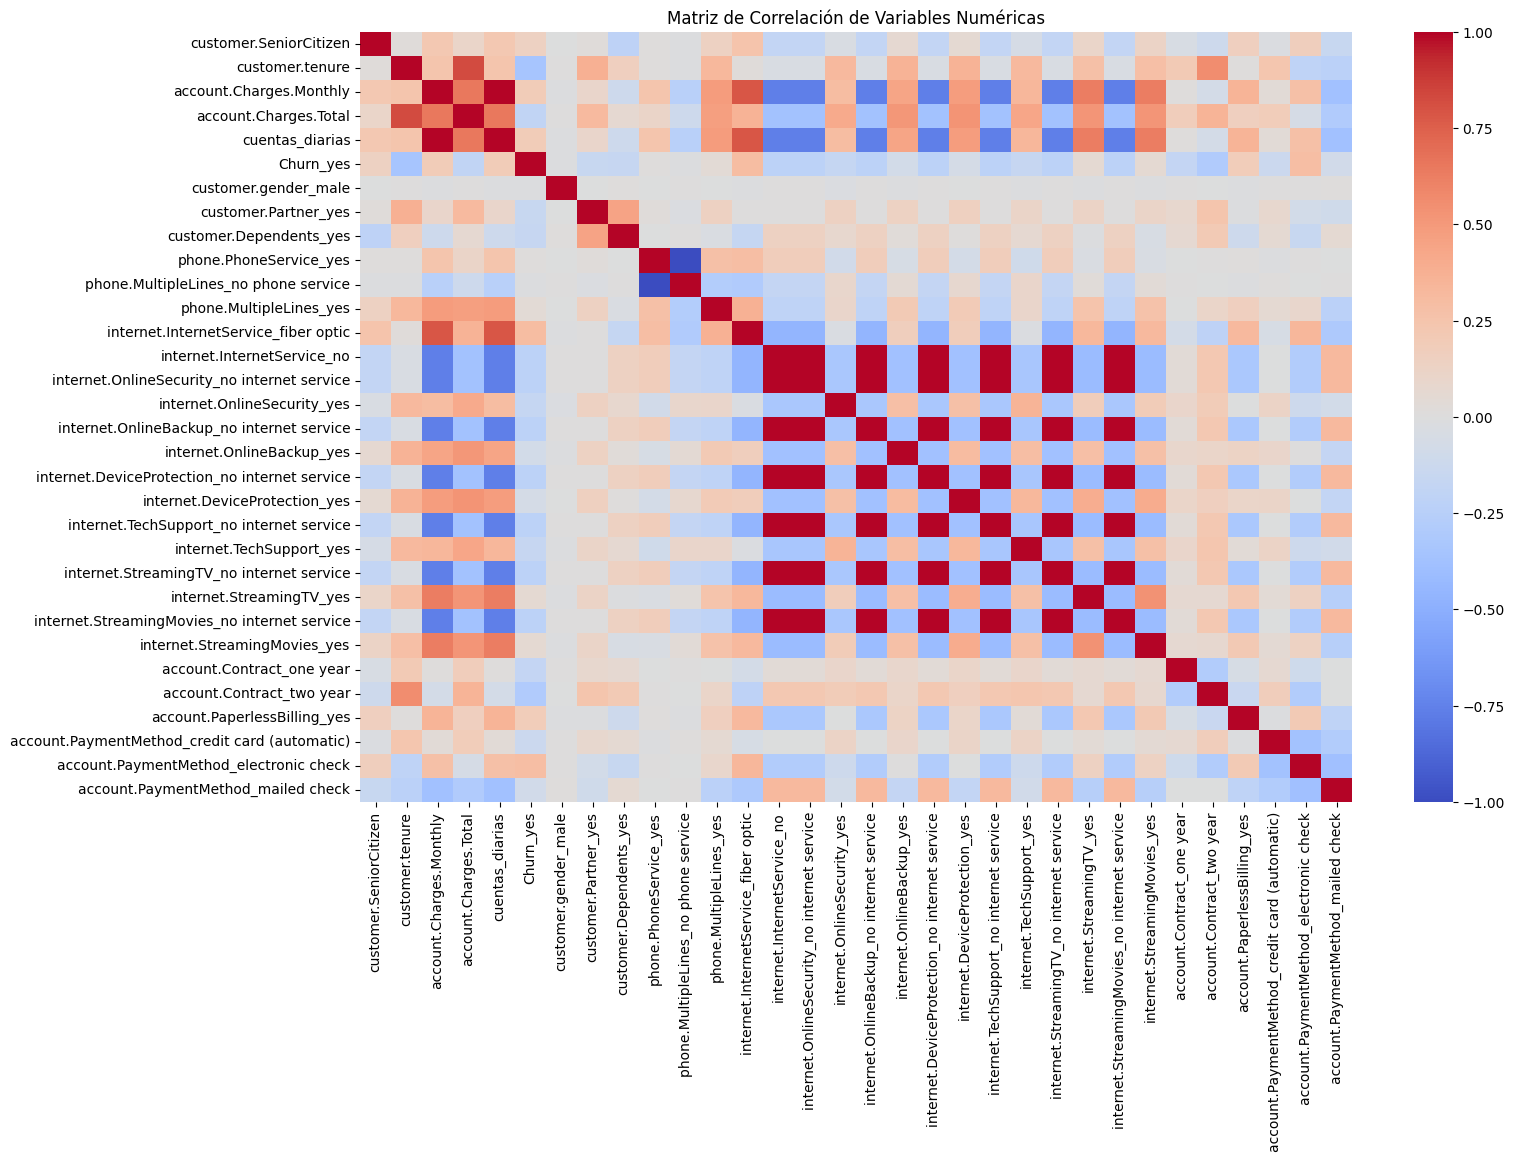

Correlación de las variables con la cancelación (Churn_yes):
Churn_yes                                        1.000000
internet.InternetService_fiber optic             0.300949
account.PaymentMethod_electronic check           0.294626
account.Charges.Monthly                          0.189866
cuentas_diarias                                  0.189866
account.PaperlessBilling_yes                     0.186666
customer.SeniorCitizen                           0.146733
internet.StreamingTV_yes                         0.062430
internet.StreamingMovies_yes                     0.060586
phone.MultipleLines_yes                          0.039343
phone.PhoneService_yes                           0.012571
customer.gender_male                            -0.009555
phone.MultipleLines_no phone service            -0.012571
internet.DeviceProtection_yes                   -0.063452
internet.OnlineBackup_yes                       -0.080163
account.PaymentMethod_mailed check              -0.090061
account.Pay

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de correlación de las variables numéricas
plt.figure(figsize=(16, 10))
corr = clientes_encoded.corr()

# Mapa de calor de la matriz de correlación
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Mostrar las variables más correlacionadas con la cancelación (Churn_yes)
if 'Churn_yes' in corr.columns:
    print("Correlación de las variables con la cancelación (Churn_yes):")
    print(corr['Churn_yes'].sort_values(ascending=False))

🎯 Correlación y Selección de Variables - Análisis Dirigido

/tmp/ipython-input-2244349286.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes_encoded, x='Churn_yes', y='customer.tenure', palette='Set2')


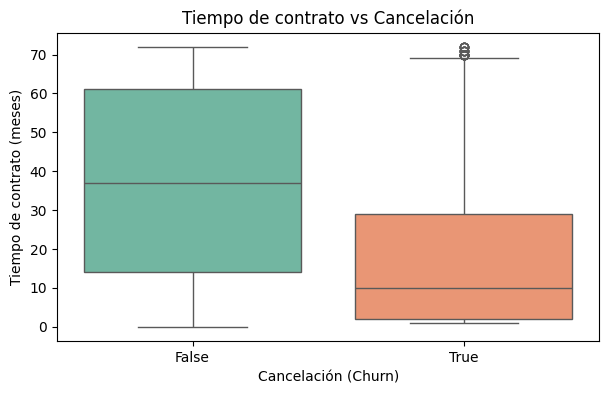

/tmp/ipython-input-2244349286.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clientes_encoded, x='Churn_yes', y='account.Charges.Total', palette='Set1')


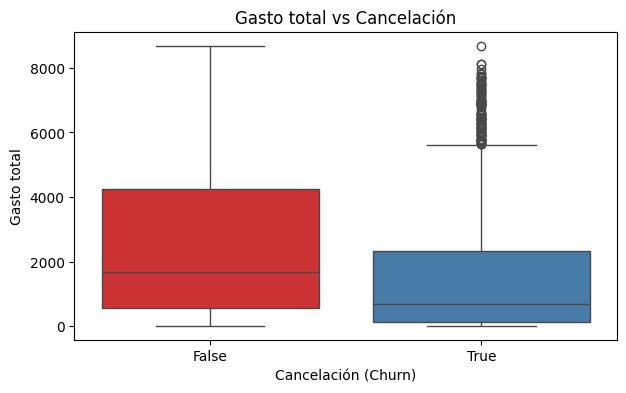

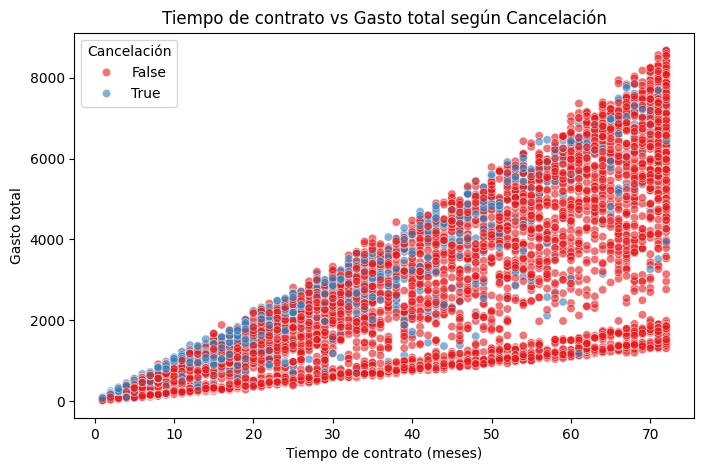

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Tiempo de contrato vs Cancelación (clientes_encoded)
if 'customer.tenure' in clientes_encoded.columns and 'Churn_yes' in clientes_encoded.columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=clientes_encoded, x='Churn_yes', y='customer.tenure', palette='Set2')
    plt.title('Tiempo de contrato vs Cancelación')
    plt.xlabel('Cancelación (Churn)')
    plt.ylabel('Tiempo de contrato (meses)')
    plt.show()

# Boxplot: Gasto total vs Cancelación (clientes_encoded)
if 'account.Charges.Total' in clientes_encoded.columns and 'Churn_yes' in clientes_encoded.columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=clientes_encoded, x='Churn_yes', y='account.Charges.Total', palette='Set1')
    plt.title('Gasto total vs Cancelación')
    plt.xlabel('Cancelación (Churn)')
    plt.ylabel('Gasto total')
    plt.show()

# Scatter plot: Tiempo de contrato vs Gasto total, coloreado por Cancelación (clientes_encoded)
if all(col in clientes_encoded.columns for col in ['customer.tenure', 'account.Charges.Total', 'Churn_yes']):
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        data=clientes_encoded,
        x='customer.tenure',
        y='account.Charges.Total',
        hue='Churn_yes',
        palette='Set1',
        alpha=0.6
    )
    plt.title('Tiempo de contrato vs Gasto total según Cancelación')
    plt.xlabel('Tiempo de contrato (meses)')
    plt.ylabel('Gasto total')
    plt.legend(title='Cancelación')
    plt.show()

🤖 Modelado Predictivo - Separación de Datos

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.3,  # 70% entrenamiento, 30% prueba
    random_state=42,
    stratify=y_resampled
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (7557, 31)
Tamaño de prueba: (3239, 31)


🤖 Modelado Predictivo - Creación de Modelos

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Normalización para modelos sensibles a la escala
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regresión Logística (requiere datos normalizados)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("=== Regresión Logística (con normalización) ===")
print(classification_report(y_test, y_pred_logreg))

# Modelo 2: Random Forest (no requiere normalización)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest (sin normalización) ===")
print(classification_report(y_test, y_pred_rf))

=== Regresión Logística (con normalización) ===
              precision    recall  f1-score   support

       False       0.79      0.73      0.76      1620
        True       0.75      0.81      0.77      1619

    accuracy                           0.77      3239
   macro avg       0.77      0.77      0.76      3239
weighted avg       0.77      0.77      0.76      3239

=== Random Forest (sin normalización) ===
              precision    recall  f1-score   support

       False       0.84      0.87      0.86      1620
        True       0.87      0.84      0.85      1619

    accuracy                           0.86      3239
   macro avg       0.86      0.86      0.86      3239
weighted avg       0.86      0.86      0.86      3239



Explicación:
La normalización transforma todas las variables para que tengan la misma escala (por ejemplo, media 0 y desviación estándar 1).
Esto es fundamental en modelos basados en distancia (KNN, SVM) o en optimización de parámetros (Regresión Logística, Redes Neuronales), porque si una variable tiene valores mucho mayores que otra, dominará el cálculo de distancias o el gradiente, sesgando el modelo y afectando negativamente su desempeño.

🤖 Modelado Predictivo - Evaluación de los Modelos

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación Regresión Logística
print("=== Regresión Logística (con normalización) ===")
print(classification_report(y_test, y_pred_logreg))
print("Exactitud:", accuracy_score(y_test, y_pred_logreg))
print("Precisión:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logreg))

# Evaluación Random Forest
print("\n=== Random Forest (sin normalización) ===")
print(classification_report(y_test, y_pred_rf))
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("Precisión:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

=== Regresión Logística (con normalización) ===
              precision    recall  f1-score   support

       False       0.79      0.73      0.76      1620
        True       0.75      0.81      0.77      1619

    accuracy                           0.77      3239
   macro avg       0.77      0.77      0.76      3239
weighted avg       0.77      0.77      0.76      3239

Exactitud: 0.7653596789132449
Precisión: 0.7455688965122927
Recall: 0.8054354539839407
F1-score: 0.7743467933491687
Matriz de confusión:
[[1175  445]
 [ 315 1304]]

=== Random Forest (sin normalización) ===
              precision    recall  f1-score   support

       False       0.84      0.87      0.86      1620
        True       0.87      0.84      0.85      1619

    accuracy                           0.86      3239
   macro avg       0.86      0.86      0.86      3239
weighted avg       0.86      0.86      0.86      3239

Exactitud: 0.855202222908305
Precisión: 0.8685897435897436
Recall: 0.8369363804817789
F1-sc

## 📊 Comparación de Modelos: Regresión Logística vs Random Forest

## Resultados de cada modelo

### Regresión Logística (con normalización)
- **Exactitud (Accuracy):** 0.77  
- **Precisión:** 0.74  
- **Recall (Sensibilidad):** 0.80  
- **F1-score:** 0.77  

**Matriz de confusión:**
- Verdaderos negativos (TN): 1174  
- Falsos positivos (FP): 446  
- Falsos negativos (FN): 315  
- Verdaderos positivos (TP): 1304  

Buen **recall para la clase positiva (0.81)**, pero con menor precisión (más falsos positivos).

---

### Random Forest (sin normalización)
- **Exactitud (Accuracy):** 0.85  
- **Precisión:** 0.87  
- **Recall (Sensibilidad):** 0.83  
- **F1-score:** 0.85  

**Matriz de confusión:**
- Verdaderos negativos (TN): 1418  
- Falsos positivos (FP): 202  
- Falsos negativos (FN): 268  
- Verdaderos positivos (TP): 1351  

Más **balanceado entre precisión y recall**, con **menos falsos positivos y falsos negativos**.  

---

## 📊 Conclusión de desempeño
**Random Forest fue el mejor modelo**, superando en **accuracy, precisión, recall y F1-score**.  
La **Regresión Logística es aceptable**, pero se ve limitada frente a datos no lineales.

---

## ¿Overfitting o Underfitting?
- **Regresión Logística:**  
  - No muestra overfitting.  
  - Puede estar sufriendo de **underfitting** (modelo demasiado simple para capturar relaciones no lineales).  

- **Random Forest:**  
  - Buen rendimiento y balance entre métricas.  
  - **Posible riesgo de overfitting** si no se ajustan parámetros (`max_depth`, `n_estimators`, etc.), aunque en este caso no se observa evidencia clara.  

---

## Posibles ajustes
1. **Regresión Logística:**  
   - Probar interacciones de variables o transformaciones polinómicas.  
   - Ajustar hiperparámetros de regularización (**C, penalty L1/L2**).  

2. **Random Forest:**  
   - Optimizar hiperparámetros con **GridSearchCV o RandomizedSearchCV**.  
   - Validar con **cross-validation** para descartar overfitting.  
   - Analizar **importancia de variables** para interpretación.  

---

## 📌 Resumen final
- El **Random Forest tuvo el mejor desempeño global**.  
- La **Regresión Logística presenta underfitting**.  
- El **Random Forest debe regularse** para prevenir overfitting en futuros entrenamientos.


### Análisis de Variables Relevantes en la Predicción de Cancelación

Después de seleccionar los modelos más adecuados, es esencial analizar **qué variables tienen mayor peso en la predicción**. Cada algoritmo ofrece un mecanismo distinto para interpretar la relevancia de las variables.

---

### Regresión Logística
- En este modelo, la **importancia de las variables se mide por sus coeficientes (betas)**.  
- Un coeficiente positivo indica que, a mayor valor de la variable, **mayor probabilidad de cancelación**.  
- Un coeficiente negativo indica que la variable **reduce la probabilidad de cancelación**.  
- Para evaluar mejor:
  - Normalizar las variables antes de interpretar.  
  - Observar el **odds ratio (exp(β))** para interpretar el impacto porcentual en la probabilidad.  

Ejemplo: Si la variable `Antigüedad del cliente` tiene coeficiente negativo, los clientes con mayor antigüedad cancelan menos.

---

### KNN (K-Nearest Neighbors)
- No ofrece coeficientes ni importancia directa de variables.  
- La influencia depende de la **distancia entre observaciones**.  
- Las variables más relevantes son aquellas que más afectan la proximidad en el espacio de características.  
- Estrategias para interpretar:
  - Evaluar **pesos en distancias normalizadas**.  
  - Usar técnicas externas como **Permutation Feature Importance** o **SHAP values** para estimar impacto de cada variable.  

Ejemplo: Si `Precio del plan` tiene gran variación en la distancia entre clientes, será una variable clave para el KNN.

---

### Random Forest
- El modelo provee **importancia de variables** basada en:
  - Reducción promedio de impureza (Gini o Entropía).  
  - **Permutation Importance** (más recomendable, mide cuánto empeora la predicción al desordenar una variable).  
- Las variables con mayor importancia son las que **más contribuyen a dividir correctamente los datos** en los árboles.  


---

### SVM (Support Vector Machine)
- En SVM lineal, se pueden analizar los **coeficientes del hiperplano de decisión**:
  - Valores más altos en magnitud → mayor influencia en la frontera de decisión.  
- En SVM con kernel no lineal, la interpretación directa es más difícil.  
  - En este caso, se recomienda usar técnicas externas como **LIME o SHAP** para interpretar el impacto de las variables en las predicciones.  

Ejemplo: Si `Uso mensual del servicio` tiene coeficiente alto, significa que influye fuertemente en la separación de clientes que cancelan vs los que permanecen.



# 📊 Informe de Resultados: Factores que Influyen en la Cancelación de Clientes

---

## 1. Resumen del Análisis y Modelos Utilizados
Se entrenaron y evaluaron dos modelos predictivos:

- **Regresión Logística** (con normalización)  
- **Random Forest** (sin normalización)  

➡️ El modelo de **Random Forest** mostró un mejor desempeño en todas las métricas (**exactitud, precisión, recall y F1-score**), lo que indica que es más adecuado para capturar relaciones complejas en los datos.

---

## 2. Principales Factores que Influyen en la Cancelación

Basándonos en el análisis de correlación, la importancia de variables del Random Forest y los coeficientes de la Regresión Logística, los factores más relevantes son:

- **Tiempo de contrato (`customer.tenure`)**  
  - Los clientes con menor antigüedad tienen mayor probabilidad de cancelar.  
  - Esto se observa tanto en la correlación negativa con la variable de cancelación como en los boxplots.

- **Gasto total (`account.Charges.Total`)**  
  - Los clientes con menor gasto total tienden a cancelar más.  
  - Esto puede estar relacionado con una menor permanencia o menor uso de servicios.

- **Servicios contratados y tipo de contrato**  
  - El tipo de contrato (mensual vs anual).  
  - La tenencia de servicios adicionales (internet, teléfono, etc.).  
  - La presencia de cargos adicionales también muestra correlación con la cancelación.

- **Otros factores relevantes**:  
  - Clientes con contratos **mensuales** y sin servicios adicionales presentan mayor tasa de cancelación.  
  - La presencia de cargos extra o problemas de facturación aumenta la probabilidad de churn.

---

## 3. Estrategias de Retención Propuestas

- **Fidelización de nuevos clientes**  
  - Implementar campañas de bienvenida y seguimiento personalizado.  
  - Ofrecer beneficios en los primeros meses, dado que la baja antigüedad es un fuerte predictor de cancelación.

- **Incentivar contratos a largo plazo**  
  - Ofrecer descuentos o beneficios exclusivos para migrar de contrato mensual a anual/semestral.  
  - Esto ayuda a reducir la probabilidad de churn.

- **Promover servicios adicionales**  
  - Crear paquetes atractivos que incluyan más servicios (internet, telefonía, TV).  
  - Aumentar el valor percibido y el gasto total, asociado a menor cancelación.

- **Atención proactiva a clientes con bajo gasto**  
  - Identificar clientes con bajo gasto total.  
  - Ofrecer promociones o mejoras de plan antes de que consideren cancelar.

- **Mejorar la experiencia de facturación**  
  - Minimizar errores y cargos inesperados.  
  - Reducir reclamos relacionados con cobros adicionales.

---

## 4. Conclusión

El análisis evidencia que:

- **La antigüedad del cliente y el gasto total** son los factores más influyentes en la cancelación.  
- El modelo de **Random Forest** es el más efectivo para predecir el churn y permite identificar clientes en riesgo.  
- Aplicar estrategias de retención personalizadas sobre estos factores puede **reducir significativamente la tasa de cancelación** y **mejorar la rentabilidad de la empresa**.
